In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
data=pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


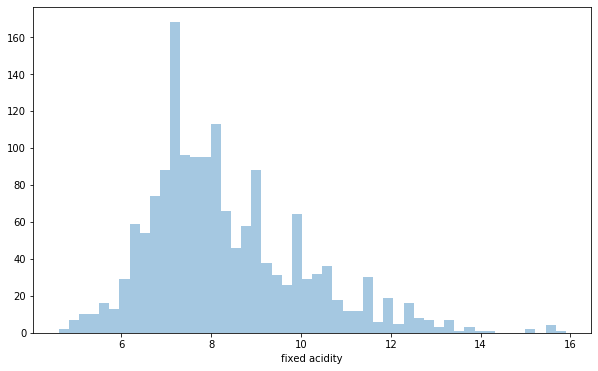

In [7]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['fixed acidity'],kde=False,bins=50)

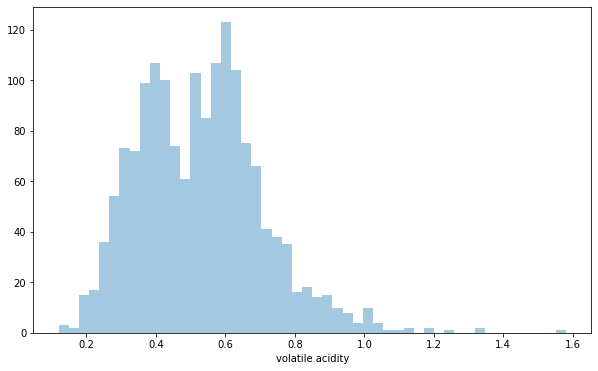

In [8]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['volatile acidity'],kde=False,bins=50)

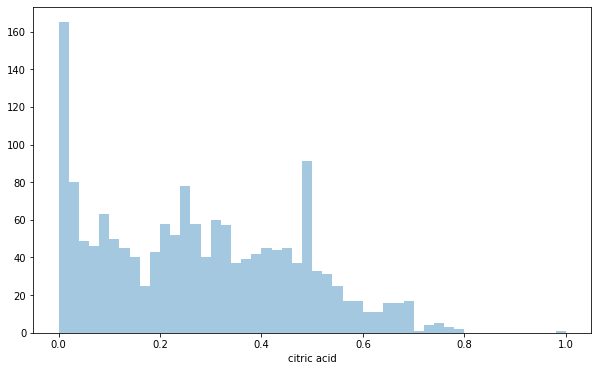

In [9]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['citric acid'],kde=False,bins=50)

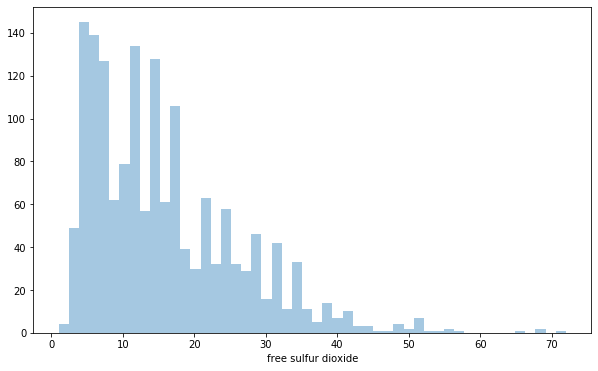

In [10]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['free sulfur dioxide'],kde=False,bins=50)

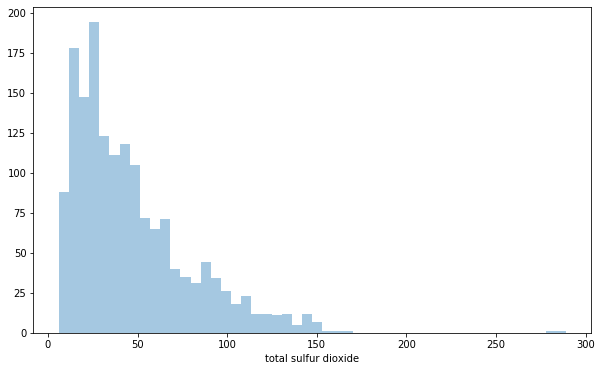

In [11]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['total sulfur dioxide'],kde=False,bins=50)

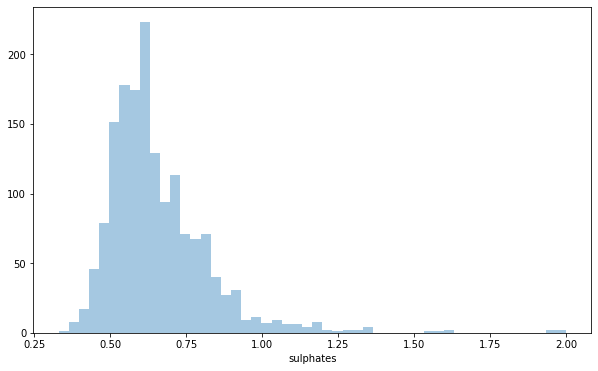

In [12]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['sulphates'],kde=False,bins=50)

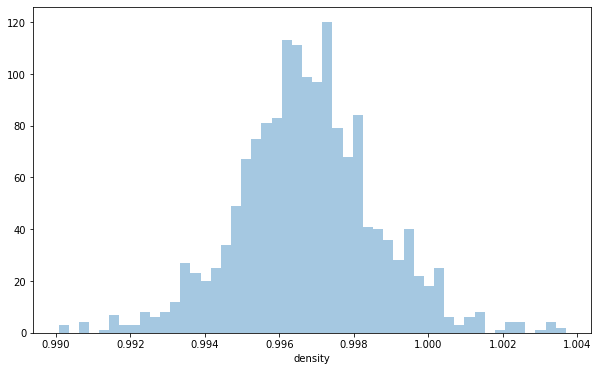

In [13]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['density'],kde=False,bins=50)

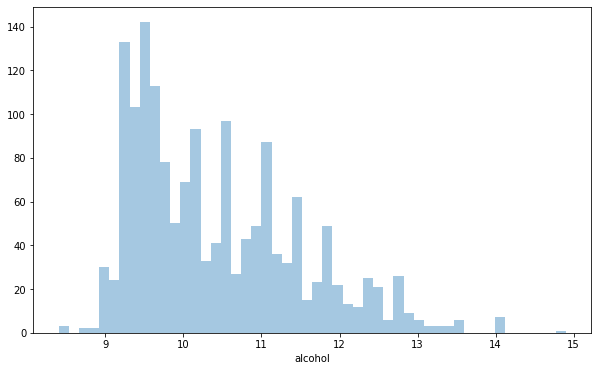

In [14]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['alcohol'],kde=False,bins=50)

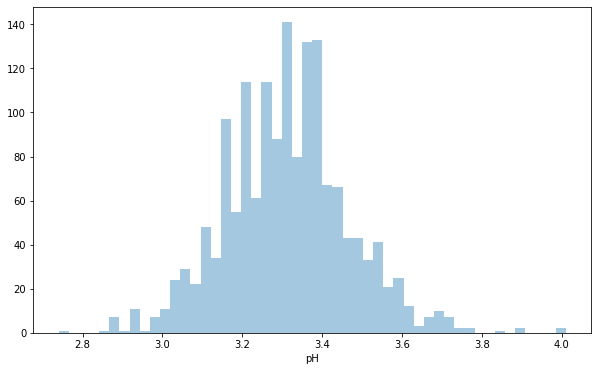

In [15]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['pH'],kde=False,bins=50)

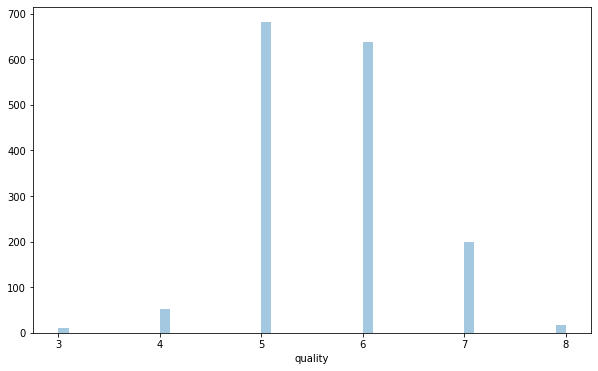

In [16]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['quality'],kde=False,bins=50)

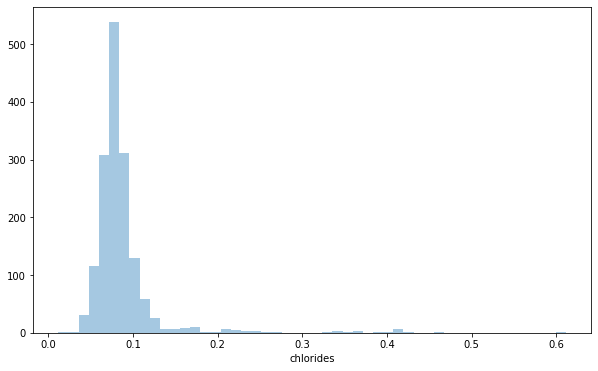

In [17]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['chlorides'],kde=False,bins=50)

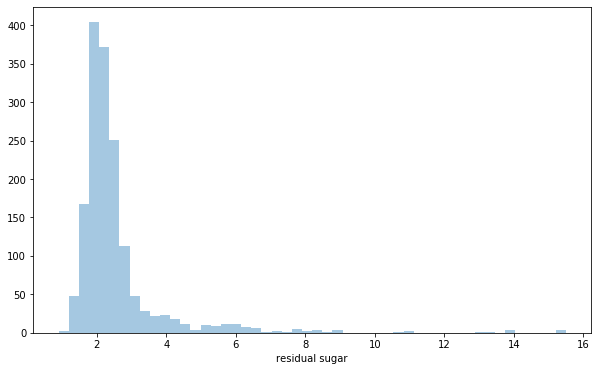

In [18]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(data['residual sugar'],kde=False,bins=50)

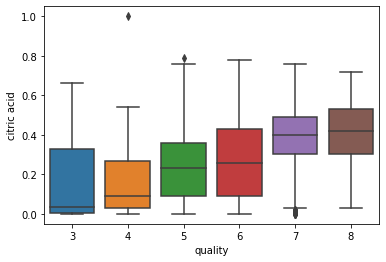

In [19]:
sns.boxplot(x='quality',y='citric acid',data=data)

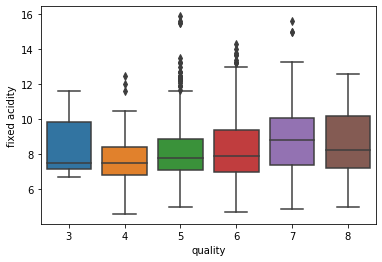

In [20]:
sns.boxplot(x='quality',y='fixed acidity',data=data)

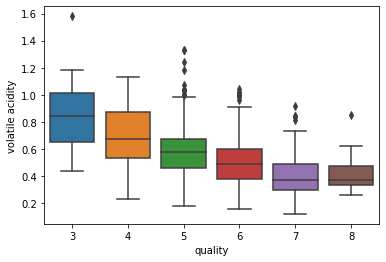

In [21]:
sns.boxplot(x='quality',y='volatile acidity',data=data)

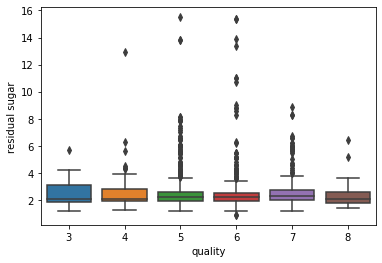

In [22]:
sns.boxplot(x='quality',y='residual sugar',data=data)

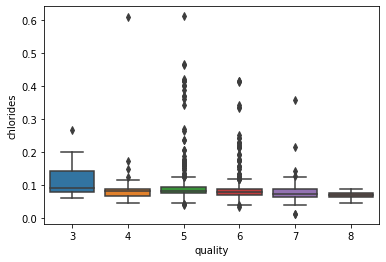

In [23]:
sns.boxplot(x='quality',y='chlorides',data=data)

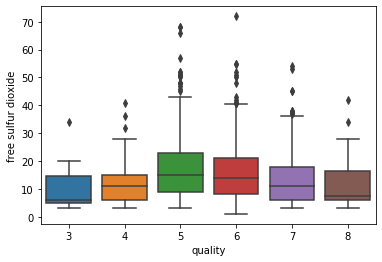

In [24]:
sns.boxplot(x='quality',y='free sulfur dioxide',data=data)

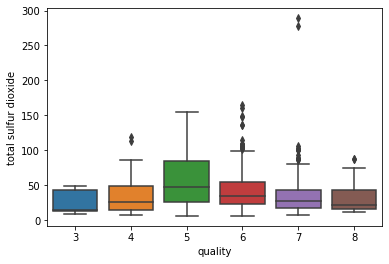

In [25]:
sns.boxplot(x='quality',y='total sulfur dioxide',data=data)

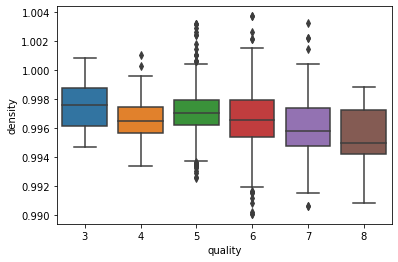

In [26]:
sns.boxplot(x='quality',y='density',data=data)

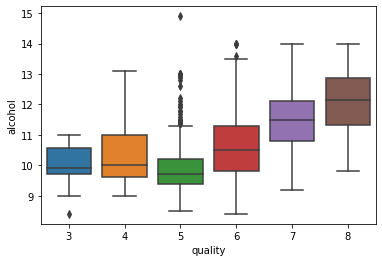

In [27]:
sns.boxplot(x='quality',y='alcohol',data=data)

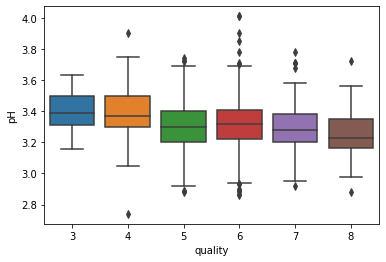

In [28]:
sns.boxplot(x='quality',y='pH',data=data)

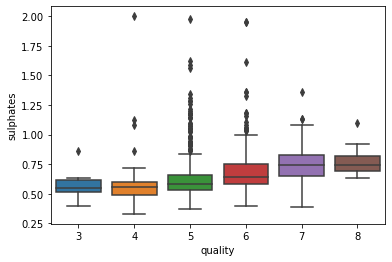

In [29]:
sns.boxplot(x='quality',y='sulphates',data=data)

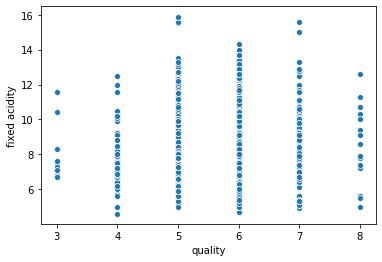

In [30]:
sns.scatterplot(x='quality',y='fixed acidity',data=data)

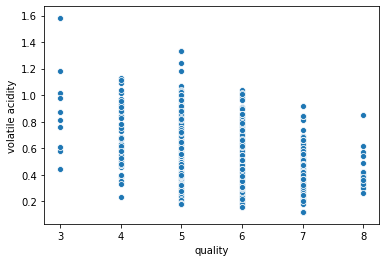

In [31]:
sns.scatterplot(x='quality',y='volatile acidity',data=data)

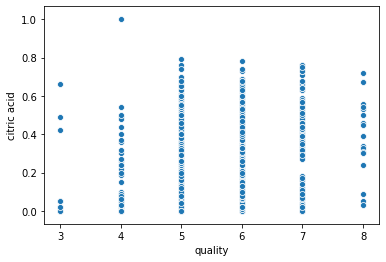

In [32]:
sns.scatterplot(x='quality',y='citric acid',data=data)

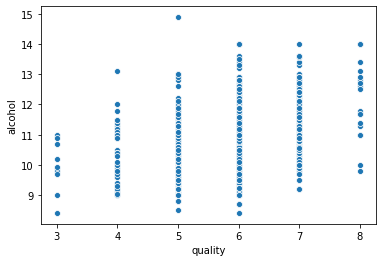

In [33]:
sns.scatterplot(x='quality',y='alcohol',data=data)

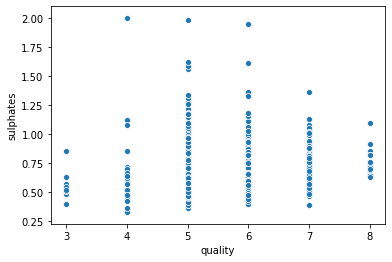

In [34]:
sns.scatterplot(x='quality',y='sulphates',data=data)

In [35]:
data['quality']=pd.cut(data['quality'],bins=(2,6.5,8),labels=['bad','good'])

In [36]:
le=LabelEncoder()
new_data=le.fit_transform(data['quality'])

In [37]:
data['quality']=new_data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [38]:
X=data.drop('quality',axis=1)
y=data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
sc = StandardScaler()

In [40]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [41]:
error_rate = []
for i in range(1,40):
 
 knc = KNeighborsClassifier(n_neighbors=i)
 knc.fit(X_train,y_train)
 pred_i = knc.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

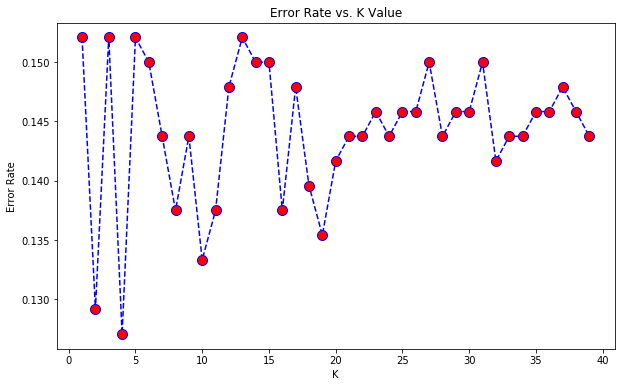

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
knc = KNeighborsClassifier(n_neighbors=4)
knc.fit(X_train,y_train)
knc_prediction = knc.predict(X_test)

In [44]:
print(confusion_matrix(y_test,knc_prediction))

[[396  16]
 [ 45  23]]


In [45]:
print(classification_report(y_test,knc_prediction))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       412
           1       0.59      0.34      0.43        68

    accuracy                           0.87       480
   macro avg       0.74      0.65      0.68       480
weighted avg       0.85      0.87      0.86       480



In [46]:
print("Accuracy:{}".format(accuracy_score(y_test,knc_prediction)))

Accuracy:0.8729166666666667
